In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from collections import Counter

import sys
sys.path.append('../')
from src.cantus_filters import *

import matplotlib
from helpers import cm2inch, show_num_contours
matplotlib.style.use('styles.mplstyle')

In [2]:
connections = pd.read_csv('../data/differentiae/connections.csv', index_col=0)

In [3]:
def estimate_entropy(connections, start=-6, end=0):
    entropies = []
    for mode in range(1, 9):
        counts = Counter()
        subset = connections.query(f'mode=={mode}').iloc[:, 17+start:17+end]
        for idx, contour in subset.iterrows():
            pitches = contour.values.astype(int)
            differentia = tuple(pitches)
            counts[differentia] += 1
        freqs = np.array(list(counts.values()))
        probs = freqs / sum(freqs)
        H = entropy(probs, base=2)
        entropies.append(H)
    return entropies

In [4]:
entropies = []
window = 4
for start in range(-15, 15-window):
    H = estimate_entropy(connections, start=start, end=start+window)
    entropies.append(H)
entropies = np.array(entropies)    

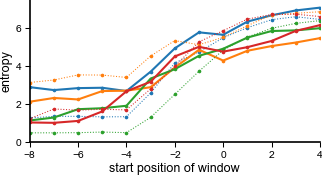

In [5]:
plt.figure(figsize=cm2inch(6, 3.5))
for mode in range(1, 9):
    color = f'C{(mode-1)//2}'
    ls = [':', '-'][mode%2]
    plt.plot(np.arange(-15, 15-window), entropies[:, mode-1].T, label=mode,
             lw=[.5, 1][mode%2],
             marker='.', ms=1.5,
             color=color, 
             ls=ls)
plt.xlim(-8, 4)
plt.ylim(0,7.5)
plt.ylabel('entropy')
plt.xlabel('start position of window')
# plt.xticks(np.arange(-8, 5))
plt.tight_layout()
plt.savefig('../figures/fig06/fig-entropy.pdf',
           bbox_inches='tight', pad_inches=0)

In [6]:
def plot_entropies(entropies):
    plt.bar(np.arange(1, 3), entropies[:2])
    plt.bar(np.arange(3, 5), entropies[2:4])
    plt.bar(np.arange(5, 7), entropies[4:6])
    plt.bar(np.arange(7, 9), entropies[6:8])
    plt.ylabel('Entropy')
    plt.xlabel('Mode')

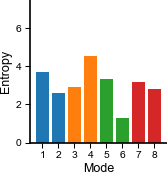

In [7]:
plt.figure(figsize=cm2inch(3, 3.2))
plot_entropies(entropies[12,:])
plt.ylim(0,7.5)
plt.xticks(np.arange(1,9));
plt.savefig('../figures/fig06/entropy-bar.pdf',
              bbox_inches='tight', pad_inches=0)